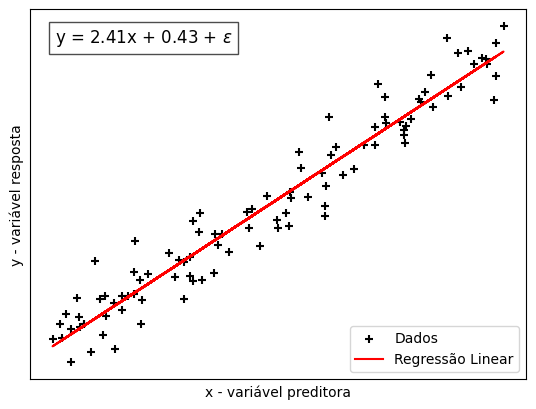

In [1]:
### REGRESSÃO LINEAR

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Gerando dados fictícios
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2.5 * X.flatten() + np.random.randn(100) * 2

# Ajustando o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plotando os dados e a linha de regressão

# plt.figure(figsize = (8, 6))
plt.scatter(X, y, color = 'black', label = 'Dados', marker = '+')
plt.plot(X, y_pred, color = 'red', label = 'Regressão Linear')
plt.xlabel('x - variável preditora')
plt.ylabel('y - variável resposta')
plt.legend()
plt.xticks([])
plt.yticks([])



# Inserir a equação da reta no gráfico
coef = model.coef_[0]
intercept = model.intercept_
equation = rf"y = {coef:.2f}x + {intercept:.2f} + $\epsilon$"
plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

plt.savefig('imagens/regressao_linear.png', bbox_inches='tight')
plt.show()
plt.close()

In [2]:
### ÁRVORE DE DECISÃO

import graphviz, re, os

from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz, DecisionTreeClassifier

# Carregando um dataset simples
iris = load_iris()
X, y = iris.data, iris.target

# Criando e treinando a árvore de decisão
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

iris.feature_names = [name.replace(' (cm)', '') for name in iris.feature_names]

# Exporta para DOT
dot_data = export_graphviz(
    clf,
    out_file = None,
    feature_names = iris.feature_names,
    class_names = iris.target_names,
    filled = False,
    rounded = True,
    special_characters = True
)

dot_data = dot_data.replace('True', 'V').replace('False', 'F')
dot_data = dot_data.replace('<br/>gini = 0.667<br/>samples = 150<br/>value = [50, 50, 50]<br/>class = setosa', '')
dot_data = dot_data.replace('gini = 0.0<br/>samples = 50<br/>value = [50, 0, 0]<br/>', '')
dot_data = dot_data.replace('<br/>gini = 0.5<br/>samples = 100<br/>value = [0, 50, 50]<br/>class = versicolor', '')
dot_data = dot_data.replace('<br/>gini = 0.168<br/>samples = 54<br/>value = [0, 49, 5]<br/>class = versicolor', '')
dot_data = dot_data.replace('gini = 0.041<br/>samples = 48<br/>value = [0, 47, 1]<br/>', '')
dot_data = dot_data.replace('gini = 0.444<br/>samples = 6<br/>value = [0, 2, 4]<br/>', '')
dot_data = dot_data.replace('<br/>gini = 0.043<br/>samples = 46<br/>value = [0, 1, 45]<br/>class = virginica', '')
dot_data = dot_data.replace('gini = 0.444<br/>samples = 3<br/>value = [0, 1, 2]<br/>', '')
dot_data = dot_data.replace('gini = 0.0<br/>samples = 43<br/>value = [0, 0, 43]<br/>', '')


dot_data_colored = re.sub(r'(label=<class = setosa>])', r'\1 [style=filled, fillcolor="#FFE5E5"]', dot_data) # laranja
dot_data_colored = re.sub(r'(label=<class = versicolor>])', r'\1 [style=filled, fillcolor="#E5E5FF"]', dot_data_colored) # azul
dot_data_colored = re.sub(r'(label=<class = virginica>])', r'\1 [style=filled, fillcolor="#E5FFE5"]', dot_data_colored) # verde

# Deixa o texto em negrito para as folhas (nós terminais)

def bold_leaf_labels(dot):

    return re.sub(
        r'(label=<class = ([^>]+)>)',
        r'label=<<b>class = \2</b>>',
        dot
    )

# dot_data_colored = bold_leaf_labels(dot_data_colored)

graph_colored = graphviz.Source(dot_data_colored)

graph_colored.render('imagens/arvore_decisao_iris', format='png')

os.remove('imagens/arvore_decisao_iris')

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.tree import plot_tree
import numpy as np

iris = load_iris()
X, y = iris.data, iris.target

# Cria e treina o modelo de Random Forest
rf = RandomForestClassifier(n_estimators = 10, random_state = 42, max_depth = 3)
rf.fit(X, y)

# Obter as previsões de cada árvore individual da Random Forest
# Cria um vetor de input para as árvores (usando uma nova observação)
nova_observacao = np.array([[5.0, 3.4, 1.5, 3]])  # exemplo de uma nova amostra

# Obter as previsões de cada árvore individual da Random Forest para a nova observação
preds_arvores = np.array([arvore.predict(nova_observacao) for arvore in rf.estimators_])

print("Previsões de cada árvore individual da Random Forest para a nova observação:")
for i, pred in enumerate(preds_arvores):
    print(f"Árvore {i + 1}: {iris.target_names[int(pred[0])]}")

print()

print("Previsão final da Random Forest para a nova observação:")
print(iris.target_names[rf.predict(nova_observacao)[0]])

Previsões de cada árvore individual da Random Forest para a nova observação:
Árvore 1: virginica
Árvore 2: setosa
Árvore 3: setosa
Árvore 4: setosa
Árvore 5: versicolor
Árvore 6: versicolor
Árvore 7: setosa
Árvore 8: versicolor
Árvore 9: setosa
Árvore 10: virginica

Previsão final da Random Forest para a nova observação:
setosa
